In [ ]:
!pip install tensorflow
!pip install Keras

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
df = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')
df.shape


(372451, 785)

In [ ]:
X = df[:,1:785]
Y = df[:,0]

(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

<ipython-input-5-1665df4f9231>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  im = plt.subplot(5, 8, i+1)


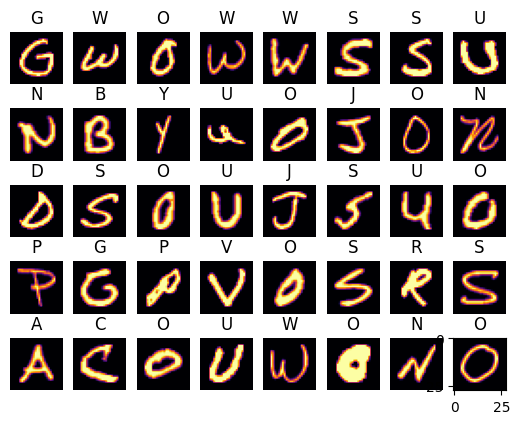

In [ ]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

for i in range(40):
    x = x_train[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(y_train[i]))
    im.imshow(x, cmap='inferno')


In [ ]:
from keras import models
from keras import layers
output_size = 26
model = models.Sequential()
model.add(layers.Dense(150, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(150, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(150, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(output_size, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])


In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
test_images.shape

(74491, 784)

In [ ]:
train_images = train_images.reshape((-1, 28 * 28))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
train_images = train_images.astype('float32') / 255

# изменение формы тензора
test_images = test_images.reshape((74491, 28 * 28))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
test_images = test_images.astype('float32') / 255


In [ ]:
def to_one_hot(labels, dimension=10): # dimension - число классов
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, 26)
test_labels = to_categorical(test_labels, 26)
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=128)

Epoch 1/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8511 - loss: 0.5271 - val_accuracy: 0.9626 - val_loss: 0.1335
Epoch 2/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9670 - loss: 0.1151 - val_accuracy: 0.9689 - val_loss: 0.1120
Epoch 3/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9756 - loss: 0.0839 - val_accuracy: 0.9741 - val_loss: 0.0932
Epoch 4/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9803 - loss: 0.0671 - val_accuracy: 0.9743 - val_loss: 0.0959
Epoch 5/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9832 - loss: 0.0567 - val_accuracy: 0.9728 - val_loss: 0.1009


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Точность на тестовом образце:', test_acc)
print('Потери на тестовом образце:', test_loss)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9716 - loss: 0.1050
Точность на тестовом образцу: 0.9728155136108398
Потери на тестовом образце: 0.10092233866453171


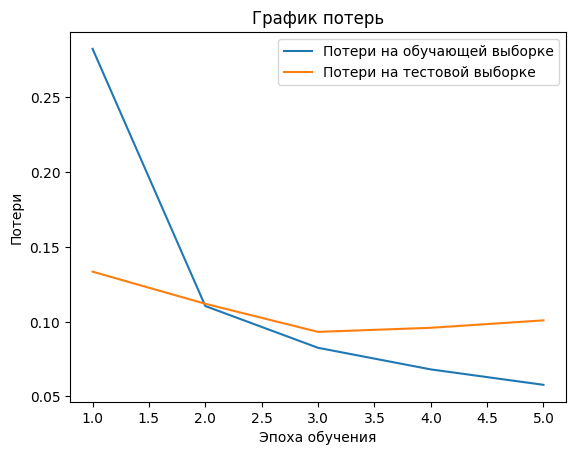

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label='Потери на обучающей выборке')
plt.plot(epochs, val_loss_values, label='Потери на тестовой выборке')
plt.title('График потерь')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

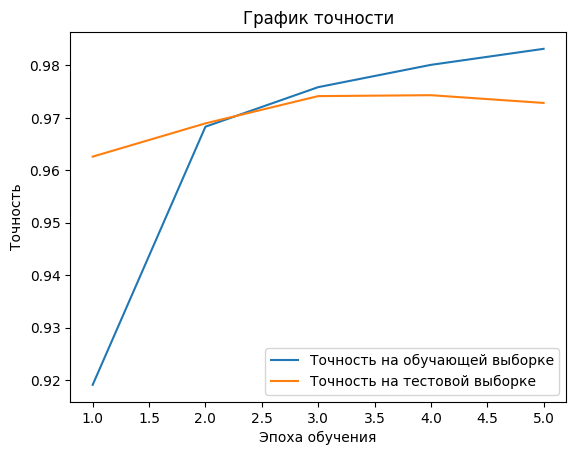

In [ ]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, label='Точность на обучающей выборке')
plt.plot(epochs, val_acc_values, label='Точность на тестовой выборке')
plt.title('График точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

**Вывод**
Модель хорошо показывающая себя на обучающих данных, не может так же хорошо себя проявлять на тестовых. На 3 эпохе произошло переобучение, в результате чего точность прогнозирования снизилась. Для оптимизации можно уменьшить число эпох до 3. Возможно, как вариант еще поиграться с числом слоев и нейронов, это это уж слишком затратно по времени)